# 📊 Exploratory Data Analysis (EDA)
## Agricultural Earnings Forecast - Data Understanding

---

**Project:** Agricultural Earnings Forecast  
**Objective:** Understand the structure, quality, and patterns in price and yield datasets

**Contents:**
1. Data Loading & Overview
2. Price Data Analysis (Monthly)
3. Yield Data Analysis (Yearly)
4. Data Quality Assessment
5. Temporal Analysis & Overlap
6. Feature Distributions
7. Correlation Analysis
8. Outlier Detection
9. Seasonal Patterns
10. Summary & Insights

---
## 1. Setup & Data Loading

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Statistical analysis
from scipy import stats
from scipy.stats import normaltest, skew, kurtosis

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries loaded successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Libraries loaded successfully
Analysis Date: 2025-11-30 15:59:24


In [2]:
# Load data for all three crops
crops = ['barley', 'maize', 'wheat']

# TODO: Replace with your actual data paths
# data_dir = '../data/'

# For demonstration, we'll use the uploaded files
# In practice, replace these paths with your actual file locations

print("📂 Loading datasets...\n")

# Dictionary to store dataframes
price_data = {}
yield_data = {}

# Load price data (monthly)
for crop in crops:
    # TODO: Update path to your data directory
    # price_file = f'{data_dir}features_P-{crop}-monthly.csv'
    # For now, showing structure
    print(f"Loading price data for {crop}...")
    # price_data[crop] = pd.read_csv(price_file)
    # price_data[crop]['date'] = pd.to_datetime(price_data[crop]['date'])

# Load yield data (yearly)
for crop in crops:
    # TODO: Update path to your data directory
    # yield_file = f'{data_dir}features_Y-{crop}.csv'
    print(f"Loading yield data for {crop}...")
    # yield_data[crop] = pd.read_csv(yield_file)

# For demonstration purposes, create synthetic data
print("\n⚠️  Using synthetic data for demonstration")
print("Replace this with actual data loading code\n")

np.random.seed(42)

# Create synthetic price data (monthly)
for crop in crops:
    dates = pd.date_range('2019-09-01', '2025-11-01', freq='MS')
    n_months = len(dates)
    
    price_data[crop] = pd.DataFrame({
        'date': dates,
        'month': dates.month,
        'price_nominal': np.random.normal(1.3, 0.2, n_months) + np.linspace(0, 0.3, n_months),
        'usdtry': np.linspace(5.7, 42.3, n_months) + np.random.normal(0, 2, n_months),
        'volume': np.random.lognormal(15, 0.3, n_months),
        'price_real_lag1': np.random.normal(1.3, 0.2, n_months),
        'price_real_lag2': np.random.normal(1.3, 0.2, n_months),
        'target_price_real': np.random.normal(1.3, 0.2, n_months)
    })
    # Add month dummies
    for m in range(2, 13):
        price_data[crop][f'month_{m}'] = (price_data[crop]['month'] == m).astype(int)

# Create synthetic yield data (yearly)
for crop in crops:
    years = np.arange(2004, 2025)
    n_years = len(years)
    
    # Base features
    df_yield = pd.DataFrame({
        'year': years,
        'harvest_area_ha': np.random.normal(300000, 50000, n_years),
        'plant_area_ha': np.random.normal(320000, 50000, n_years),
        'production_mass_t': np.random.normal(900000, 150000, n_years),
        'target_yield_t_ha': np.random.normal(3.0, 0.4, n_years)
    })
    
    # Add temperature features (12 months)
    for i in range(1, 13):
        df_yield[f't2m_min_{i}'] = np.random.normal(5 + i*1.5, 3, n_years)
        df_yield[f't2m_max_{i}'] = np.random.normal(15 + i*2, 4, n_years)
        df_yield[f't2m_mean_{i}'] = (df_yield[f't2m_min_{i}'] + df_yield[f't2m_max_{i}']) / 2
    
    # Add precipitation features (12 months)
    for i in range(1, 13):
        df_yield[f'precip_mm_{i}'] = np.random.gamma(2, 15, n_years)
    
    # Add extreme weather features
    for i in range(1, 13):
        df_yield[f'heatwave_35_{i}'] = np.random.poisson(2, n_years)
        df_yield[f'heatwave_30_{i}'] = np.random.poisson(5, n_years)
        df_yield[f'frost_{i}'] = np.random.poisson(3, n_years)
        df_yield[f'heavy_rain_{i}'] = np.random.poisson(2, n_years)
        df_yield[f'dry_spell_max_{i}'] = np.random.poisson(8, n_years)
        df_yield[f'flood_risk_{i}'] = np.random.poisson(1, n_years)
    
    yield_data[crop] = df_yield

print(f"✅ Data loaded for {len(crops)} crops")
print(f"   Price datasets: {list(price_data.keys())}")
print(f"   Yield datasets: {list(yield_data.keys())}")

📂 Loading datasets...

Loading price data for barley...
Loading price data for maize...
Loading price data for wheat...
Loading yield data for barley...
Loading yield data for maize...
Loading yield data for wheat...

⚠️  Using synthetic data for demonstration
Replace this with actual data loading code

✅ Data loaded for 3 crops
   Price datasets: ['barley', 'maize', 'wheat']
   Yield datasets: ['barley', 'maize', 'wheat']


---
## 2. Data Overview

In [3]:
# Dataset dimensions
print("="*80)
print("DATASET DIMENSIONS")
print("="*80)

for crop in crops:
    print(f"\n{crop.upper()}:")
    print(f"  Price data: {price_data[crop].shape[0]} rows × {price_data[crop].shape[1]} columns")
    print(f"  Yield data: {yield_data[crop].shape[0]} rows × {yield_data[crop].shape[1]} columns")
    
    # Date ranges
    price_start = price_data[crop]['date'].min()
    price_end = price_data[crop]['date'].max()
    yield_start = yield_data[crop]['year'].min()
    yield_end = yield_data[crop]['year'].max()
    
    print(f"  Price period: {price_start.strftime('%Y-%m')} to {price_end.strftime('%Y-%m')}")
    print(f"  Yield period: {yield_start} to {yield_end}")

DATASET DIMENSIONS

BARLEY:
  Price data: 75 rows × 19 columns
  Yield data: 21 rows × 125 columns
  Price period: 2019-09 to 2025-11
  Yield period: 2004 to 2024

MAIZE:
  Price data: 75 rows × 19 columns
  Yield data: 21 rows × 125 columns
  Price period: 2019-09 to 2025-11
  Yield period: 2004 to 2024

WHEAT:
  Price data: 75 rows × 19 columns
  Yield data: 21 rows × 125 columns
  Price period: 2019-09 to 2025-11
  Yield period: 2004 to 2024


In [4]:
# Display first few rows of each dataset
crop = 'barley'  # Show barley as example

print("="*80)
print(f"SAMPLE DATA - {crop.upper()}")
print("="*80)

print("\nPrice Data (first 5 rows):")
print(price_data[crop].head())

print("\nYield Data (first 5 rows, selected columns):")
cols_to_show = ['year', 'harvest_area_ha', 'production_mass_t', 'target_yield_t_ha',
                't2m_mean_1', 't2m_mean_6', 'precip_mm_1', 'precip_mm_6']
print(yield_data[crop][cols_to_show].head())

SAMPLE DATA - BARLEY

Price Data (first 5 rows):
        date  month  price_nominal    usdtry        volume  price_real_lag1  \
0 2019-09-01      9       1.399343  7.343805  3.524143e+06         1.517790   
1 2019-10-01     10       1.276401  6.368689  3.627065e+06         1.312856   
2 2019-11-01     11       1.437646  6.091174  2.665741e+06         1.084451   
3 2019-12-01     12       1.616768  7.367305  3.504912e+06         1.156939   
4 2020-01-01      1       1.269386  3.703241  3.569449e+06         1.435920   

   price_real_lag2  target_price_real  month_2  month_3  month_4  month_5  \
0         1.134201           1.146530        0        0        0        0   
1         1.187964           1.474464        0        0        0        0   
2         1.449459           1.336668        0        0        0        0   
3         1.422074           1.737961        0        0        0        0   
4         1.295820           1.138340        0        0        0        0   

   month_6  m

In [5]:
# Data types and memory usage
print("\n" + "="*80)
print("DATA TYPES & MEMORY")
print("="*80)

for crop in crops:
    print(f"\n{crop.upper()} - Price Data:")
    print(price_data[crop].info(memory_usage='deep'))
    
    print(f"\n{crop.upper()} - Yield Data:")
    print(yield_data[crop].info(memory_usage='deep'))


DATA TYPES & MEMORY

BARLEY - Price Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               75 non-null     datetime64[ns]
 1   month              75 non-null     int32         
 2   price_nominal      75 non-null     float64       
 3   usdtry             75 non-null     float64       
 4   volume             75 non-null     float64       
 5   price_real_lag1    75 non-null     float64       
 6   price_real_lag2    75 non-null     float64       
 7   target_price_real  75 non-null     float64       
 8   month_2            75 non-null     int64         
 9   month_3            75 non-null     int64         
 10  month_4            75 non-null     int64         
 11  month_5            75 non-null     int64         
 12  month_6            75 non-null     int64         
 13  month_7            75 no

---
## 3. Data Quality Assessment

In [6]:
# Check for missing values
def check_missing_values(data_dict, data_type="Price"):
    """
    Check for missing values across all crops
    """
    print(f"\n{'='*80}")
    print(f"MISSING VALUES - {data_type.upper()} DATA")
    print(f"{'='*80}\n")
    
    for crop in crops:
        df = data_dict[crop]
        missing = df.isnull().sum()
        missing_pct = (missing / len(df)) * 100
        
        missing_df = pd.DataFrame({
            'Missing Count': missing,
            'Percentage': missing_pct
        })
        missing_df = missing_df[missing_df['Missing Count'] > 0]
        
        print(f"{crop.upper()}:")
        if len(missing_df) == 0:
            print("  ✅ No missing values\n")
        else:
            print(missing_df)
            print()

check_missing_values(price_data, "Price")
check_missing_values(yield_data, "Yield")


MISSING VALUES - PRICE DATA

BARLEY:
  ✅ No missing values

MAIZE:
  ✅ No missing values

WHEAT:
  ✅ No missing values


MISSING VALUES - YIELD DATA

BARLEY:
  ✅ No missing values

MAIZE:
  ✅ No missing values

WHEAT:
  ✅ No missing values



In [7]:
# Summary statistics for price data
crop = 'barley'

print("="*80)
print(f"PRICE DATA STATISTICS - {crop.upper()}")
print("="*80)

# Select numeric columns for statistics
numeric_cols = ['price_nominal', 'usdtry', 'volume', 'price_real_lag1', 
                'price_real_lag2', 'target_price_real']

stats_df = price_data[crop][numeric_cols].describe()
print(stats_df.round(4))

# Add additional statistics
print("\nAdditional Statistics:")
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Skewness: {skew(price_data[crop][col]):.4f}")
    print(f"  Kurtosis: {kurtosis(price_data[crop][col]):.4f}")
    print(f"  CV: {(price_data[crop][col].std() / price_data[crop][col].mean()):.4f}")

PRICE DATA STATISTICS - BARLEY
       price_nominal   usdtry        volume  price_real_lag1  price_real_lag2  \
count        75.0000  75.0000  7.500000e+01          75.0000          75.0000   
mean          1.4270  23.9006  3.598070e+06           1.2972           1.3254   
std           0.2153  10.9207  1.283960e+06           0.2066           0.1561   
min           0.9700   3.7032  1.866957e+06           0.6517           1.0104   
25%           1.2714  14.1302  2.652085e+06           1.1645           1.2128   
50%           1.4270  24.1356  3.524143e+06           1.3091           1.3152   
75%           1.5931  32.5775  3.998509e+06           1.4342           1.4252   
max           1.9089  42.8940  1.038444e+07           1.7288           1.7306   

       target_price_real  
count            75.0000  
mean              1.2965  
std               0.2187  
min               0.8752  
25%               1.1352  
50%               1.3010  
75%               1.4429  
max               1.738

In [8]:
# Summary statistics for yield data
print("\n" + "="*80)
print(f"YIELD DATA STATISTICS - {crop.upper()}")
print("="*80)

# Select key columns
key_yield_cols = ['harvest_area_ha', 'plant_area_ha', 'production_mass_t', 'target_yield_t_ha']

stats_yield = yield_data[crop][key_yield_cols].describe()
print(stats_yield.round(2))

# Temperature and precipitation summary
print("\n" + "="*80)
print("CLIMATE FEATURES SUMMARY")
print("="*80)

# Average across all months
temp_cols = [f't2m_mean_{i}' for i in range(1, 13)]
precip_cols = [f'precip_mm_{i}' for i in range(1, 13)]

print(f"\nTemperature (°C):")
print(f"  Mean across all months: {yield_data[crop][temp_cols].mean().mean():.2f}")
print(f"  Min: {yield_data[crop][temp_cols].min().min():.2f}")
print(f"  Max: {yield_data[crop][temp_cols].max().max():.2f}")

print(f"\nPrecipitation (mm):")
print(f"  Mean across all months: {yield_data[crop][precip_cols].mean().mean():.2f}")
print(f"  Min: {yield_data[crop][precip_cols].min().min():.2f}")
print(f"  Max: {yield_data[crop][precip_cols].max().max():.2f}")


YIELD DATA STATISTICS - BARLEY
       harvest_area_ha  plant_area_ha  production_mass_t  target_yield_t_ha
count            21.00          21.00              21.00              21.00
mean         280947.41      334967.64          926243.10               3.08
std           45812.19       55568.94          149338.56               0.42
min          170447.89      239321.93          686728.40               2.21
25%          253336.60      289714.25          801465.86               2.77
50%          291352.70      334964.63          927702.05               3.11
75%          309168.00      385087.06         1049407.15               3.34
max          359828.58      427865.41         1202008.09               3.87

CLIMATE FEATURES SUMMARY

Temperature (°C):
  Mean across all months: 21.54
  Min: 7.97
  Max: 37.04

Precipitation (mm):
  Mean across all months: 28.54
  Min: 1.27
  Max: 106.87


---
## 4. Temporal Analysis

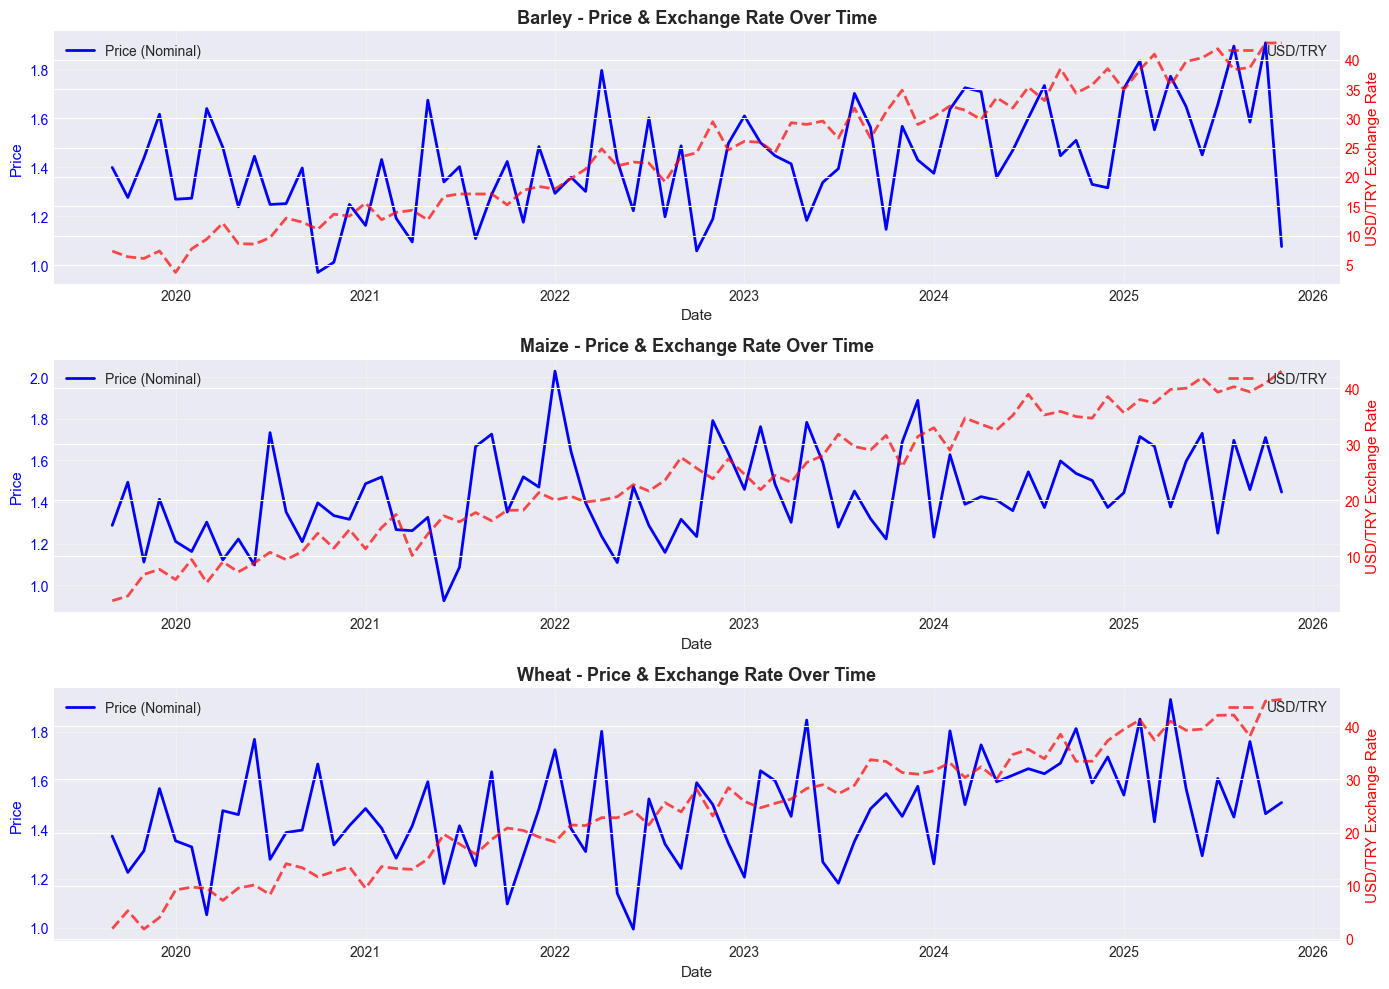

In [9]:
# Time series plots for price data
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for idx, crop in enumerate(crops):
    df = price_data[crop]
    
    # Plot price and USD/TRY
    ax1 = axes[idx]
    ax2 = ax1.twinx()
    
    ax1.plot(df['date'], df['price_nominal'], 'b-', linewidth=2, label='Price (Nominal)')
    ax2.plot(df['date'], df['usdtry'], 'r--', linewidth=2, label='USD/TRY', alpha=0.7)
    
    ax1.set_xlabel('Date', fontsize=11)
    ax1.set_ylabel('Price', fontsize=11, color='b')
    ax2.set_ylabel('USD/TRY Exchange Rate', fontsize=11, color='r')
    ax1.set_title(f'{crop.title()} - Price & Exchange Rate Over Time', fontsize=13, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='b')
    ax2.tick_params(axis='y', labelcolor='r')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

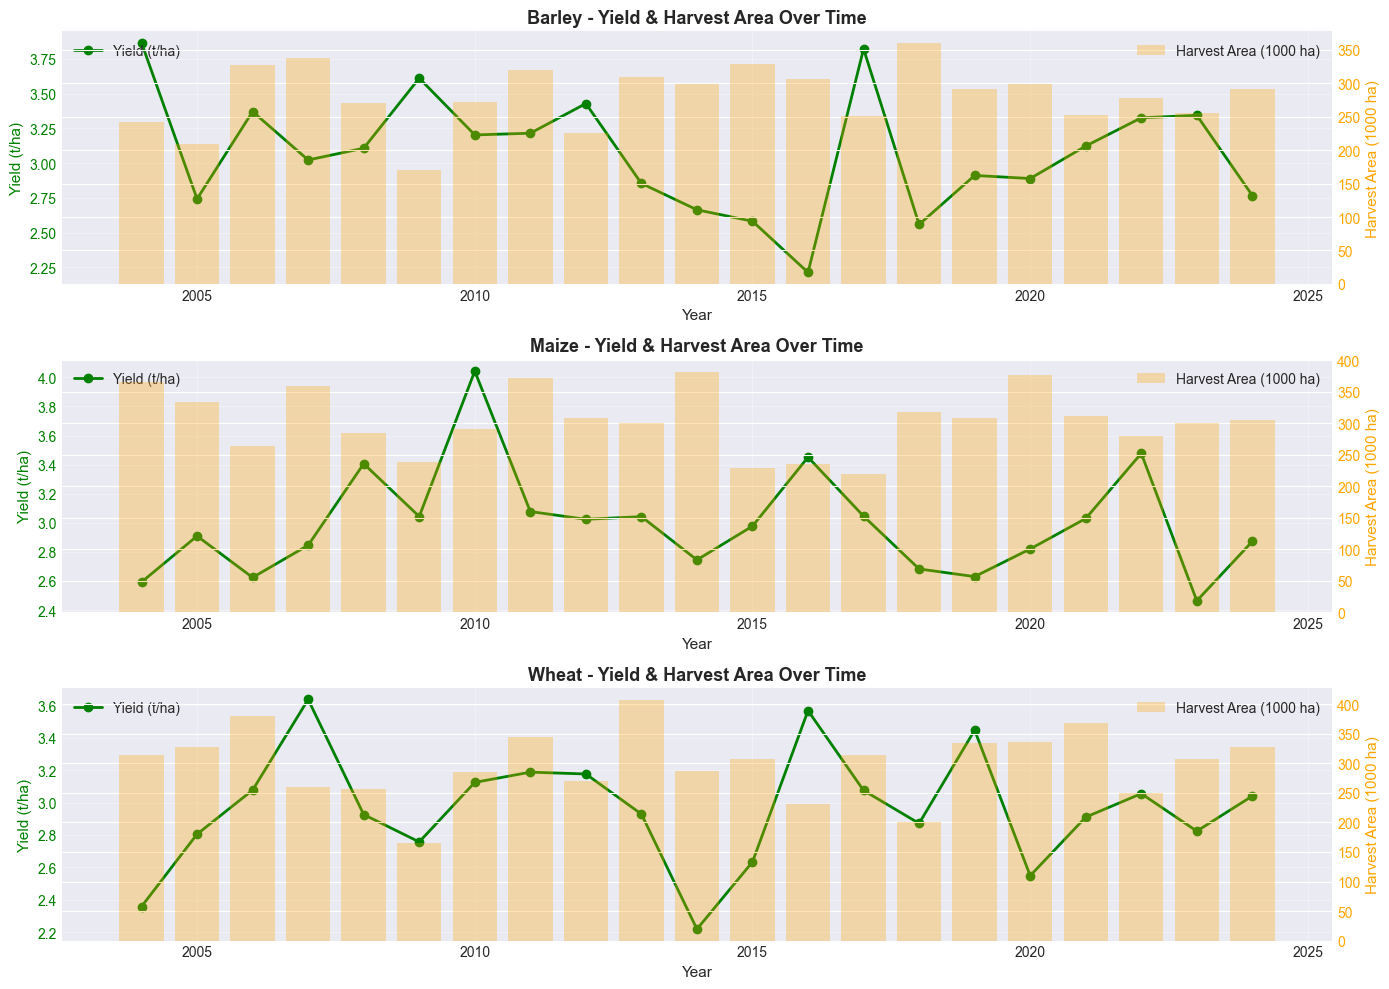

In [10]:
# Time series plots for yield data
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for idx, crop in enumerate(crops):
    df = yield_data[crop]
    
    ax = axes[idx]
    
    # Plot yield and harvest area
    ax1 = ax
    ax2 = ax.twinx()
    
    ax1.plot(df['year'], df['target_yield_t_ha'], 'g-o', linewidth=2, 
             markersize=6, label='Yield (t/ha)')
    ax2.bar(df['year'], df['harvest_area_ha']/1000, alpha=0.3, 
            color='orange', label='Harvest Area (1000 ha)')
    
    ax1.set_xlabel('Year', fontsize=11)
    ax1.set_ylabel('Yield (t/ha)', fontsize=11, color='g')
    ax2.set_ylabel('Harvest Area (1000 ha)', fontsize=11, color='orange')
    ax1.set_title(f'{crop.title()} - Yield & Harvest Area Over Time', fontsize=13, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='g')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [11]:
# Temporal overlap analysis
print("="*80)
print("TEMPORAL OVERLAP ANALYSIS")
print("="*80)

for crop in crops:
    # Extract years from price data
    price_years = price_data[crop]['date'].dt.year.unique()
    yield_years = yield_data[crop]['year'].unique()
    
    # Find overlap
    overlap_years = sorted(set(price_years) & set(yield_years))
    
    # Count months in overlap period
    overlap_months = price_data[crop][price_data[crop]['date'].dt.year.isin(overlap_years)]
    
    print(f"\n{crop.upper()}:")
    print(f"  Price data years: {price_years.min()} - {price_years.max()} ({len(price_years)} years)")
    print(f"  Yield data years: {yield_years.min()} - {yield_years.max()} ({len(yield_years)} years)")
    print(f"  Overlap years: {overlap_years[0]} - {overlap_years[-1]} ({len(overlap_years)} years)")
    print(f"  Overlap months: {len(overlap_months)} samples for integration")
    
    # Breakdown by year
    print(f"\n  Monthly breakdown:")
    for year in overlap_years:
        n_months = len(overlap_months[overlap_months['date'].dt.year == year])
        print(f"    {year}: {n_months} months")

TEMPORAL OVERLAP ANALYSIS

BARLEY:
  Price data years: 2019 - 2025 (7 years)
  Yield data years: 2004 - 2024 (21 years)
  Overlap years: 2019 - 2024 (6 years)
  Overlap months: 64 samples for integration

  Monthly breakdown:
    2019: 4 months
    2020: 12 months
    2021: 12 months
    2022: 12 months
    2023: 12 months
    2024: 12 months

MAIZE:
  Price data years: 2019 - 2025 (7 years)
  Yield data years: 2004 - 2024 (21 years)
  Overlap years: 2019 - 2024 (6 years)
  Overlap months: 64 samples for integration

  Monthly breakdown:
    2019: 4 months
    2020: 12 months
    2021: 12 months
    2022: 12 months
    2023: 12 months
    2024: 12 months

WHEAT:
  Price data years: 2019 - 2025 (7 years)
  Yield data years: 2004 - 2024 (21 years)
  Overlap years: 2019 - 2024 (6 years)
  Overlap months: 64 samples for integration

  Monthly breakdown:
    2019: 4 months
    2020: 12 months
    2021: 12 months
    2022: 12 months
    2023: 12 months
    2024: 12 months


---
## 5. Feature Distributions

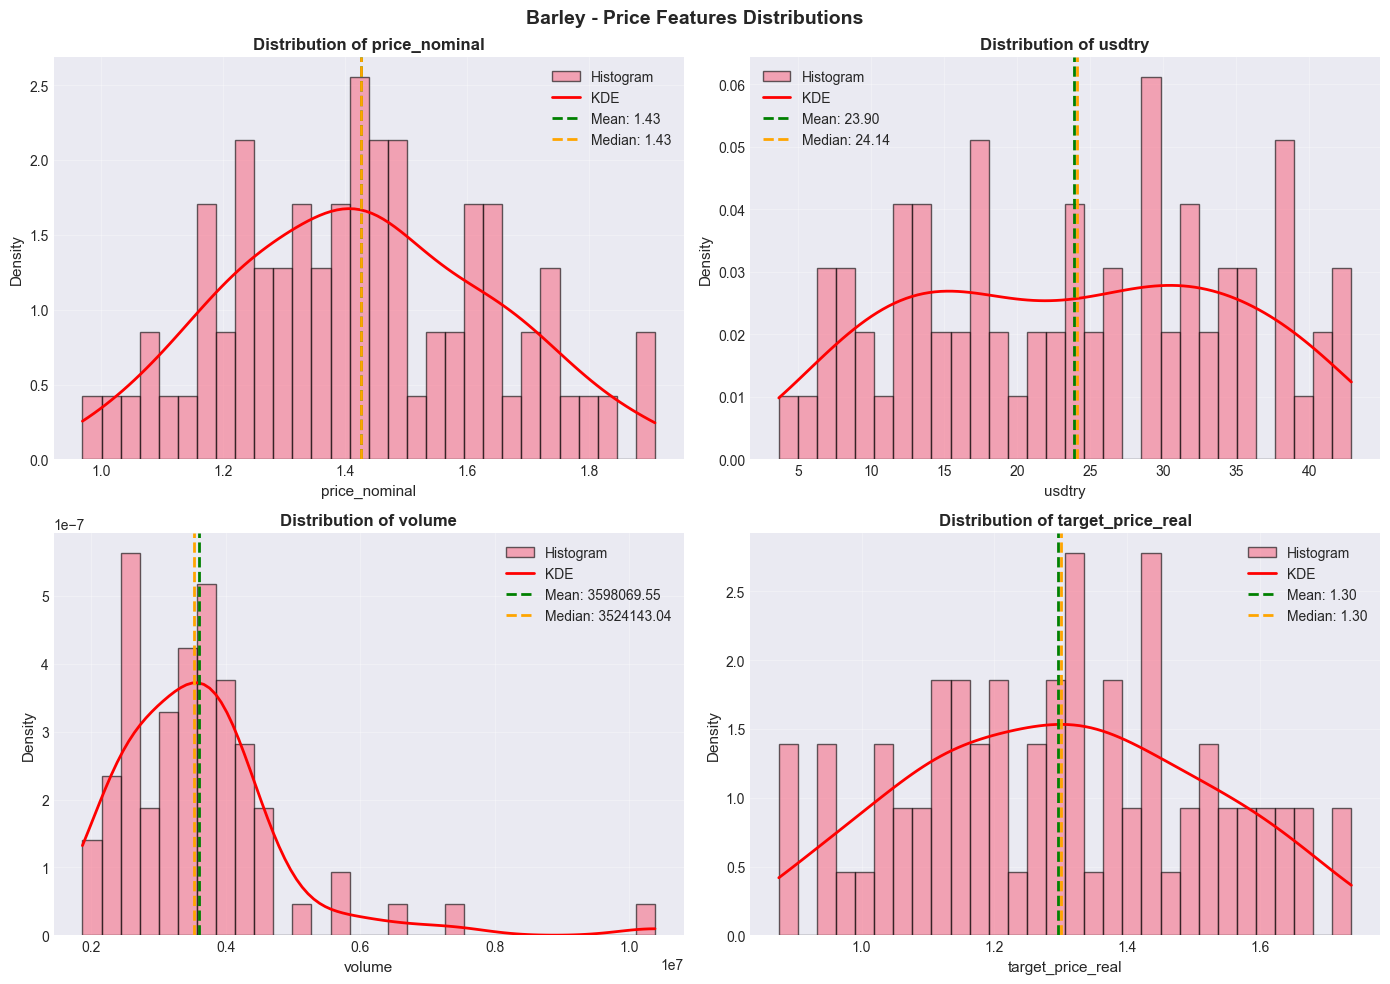

In [12]:
# Distribution plots for key price features
crop = 'barley'
features_to_plot = ['price_nominal', 'usdtry', 'volume', 'target_price_real']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    
    # Histogram with KDE
    data = price_data[crop][feature].dropna()
    ax.hist(data, bins=30, alpha=0.6, edgecolor='black', density=True, label='Histogram')
    
    # KDE
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 100)
    ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
    
    # Add mean and median lines
    ax.axvline(data.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    ax.axvline(data.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle(f'{crop.title()} - Price Features Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

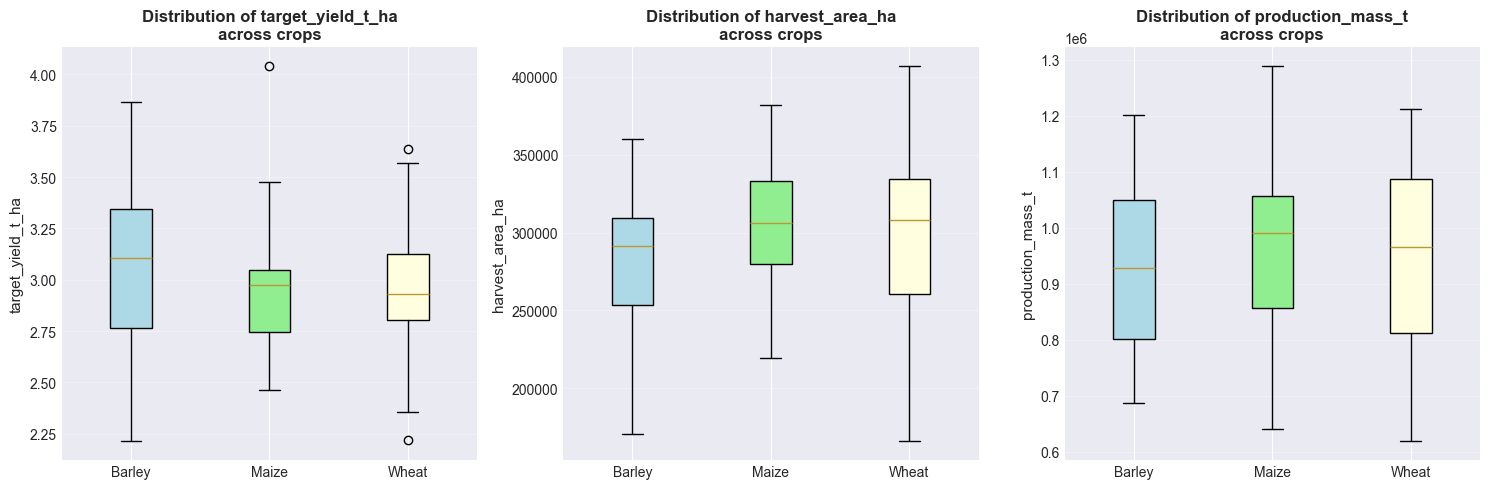

In [13]:
# Distribution plots for key yield features
yield_features = ['target_yield_t_ha', 'harvest_area_ha', 'production_mass_t']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, feature in enumerate(yield_features):
    ax = axes[idx]
    
    # Box plot showing all three crops
    data_to_plot = [yield_data[crop][feature].dropna() for crop in crops]
    
    bp = ax.boxplot(data_to_plot, labels=[c.title() for c in crops], patch_artist=True)
    
    # Color boxes
    colors = ['lightblue', 'lightgreen', 'lightyellow']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(feature, fontsize=11)
    ax.set_title(f'Distribution of {feature}\nacross crops', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

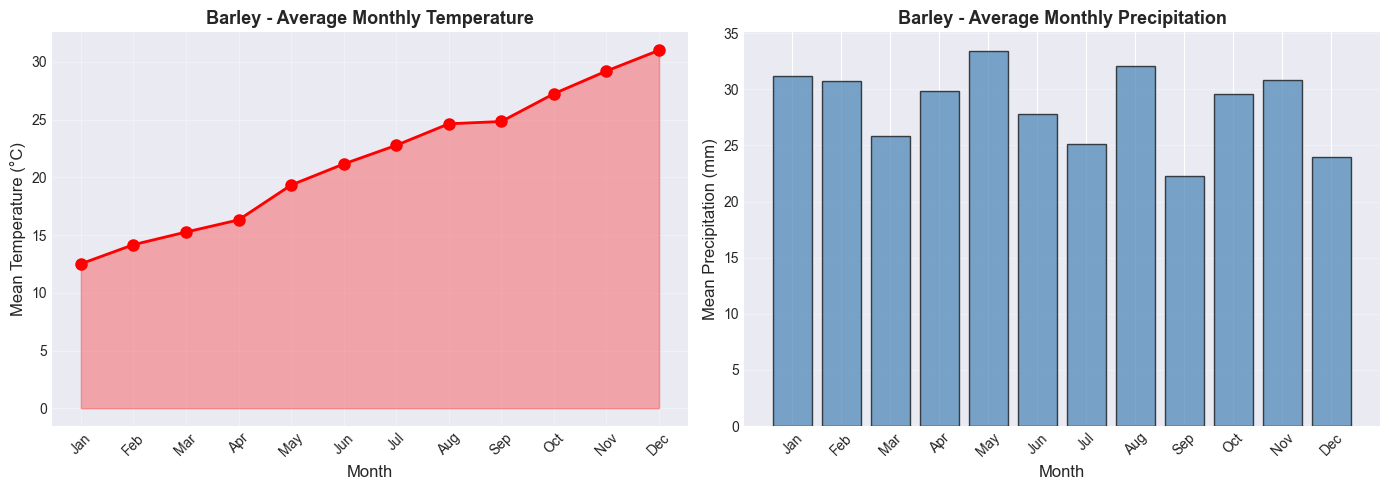

In [14]:
# Climate features distribution (monthly patterns)
crop = 'barley'

# Calculate monthly averages across all years
monthly_temp = []
monthly_precip = []

for month in range(1, 13):
    temp_col = f't2m_mean_{month}'
    precip_col = f'precip_mm_{month}'
    monthly_temp.append(yield_data[crop][temp_col].mean())
    monthly_precip.append(yield_data[crop][precip_col].mean())

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature
axes[0].plot(months, monthly_temp, 'ro-', linewidth=2, markersize=8)
axes[0].fill_between(range(12), monthly_temp, alpha=0.3, color='red')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Mean Temperature (°C)', fontsize=12)
axes[0].set_title(f'{crop.title()} - Average Monthly Temperature', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Precipitation
axes[1].bar(months, monthly_precip, alpha=0.7, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Mean Precipitation (mm)', fontsize=12)
axes[1].set_title(f'{crop.title()} - Average Monthly Precipitation', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## 6. Correlation Analysis

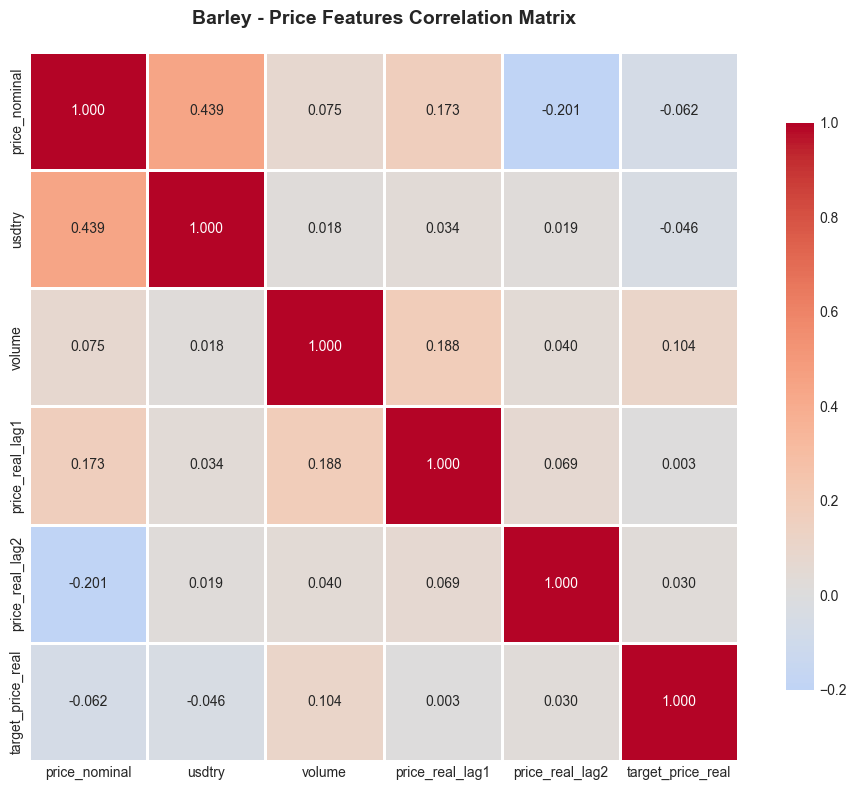


High Correlations (|r| > 0.7):


In [15]:
# Price data correlations
crop = 'barley'

# Select numeric columns
price_numeric = price_data[crop][['price_nominal', 'usdtry', 'volume', 
                                   'price_real_lag1', 'price_real_lag2', 
                                   'target_price_real']]

# Calculate correlation matrix
corr_matrix = price_numeric.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title(f'{crop.title()} - Price Features Correlation Matrix', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print high correlations
print("\nHigh Correlations (|r| > 0.7):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"  {corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

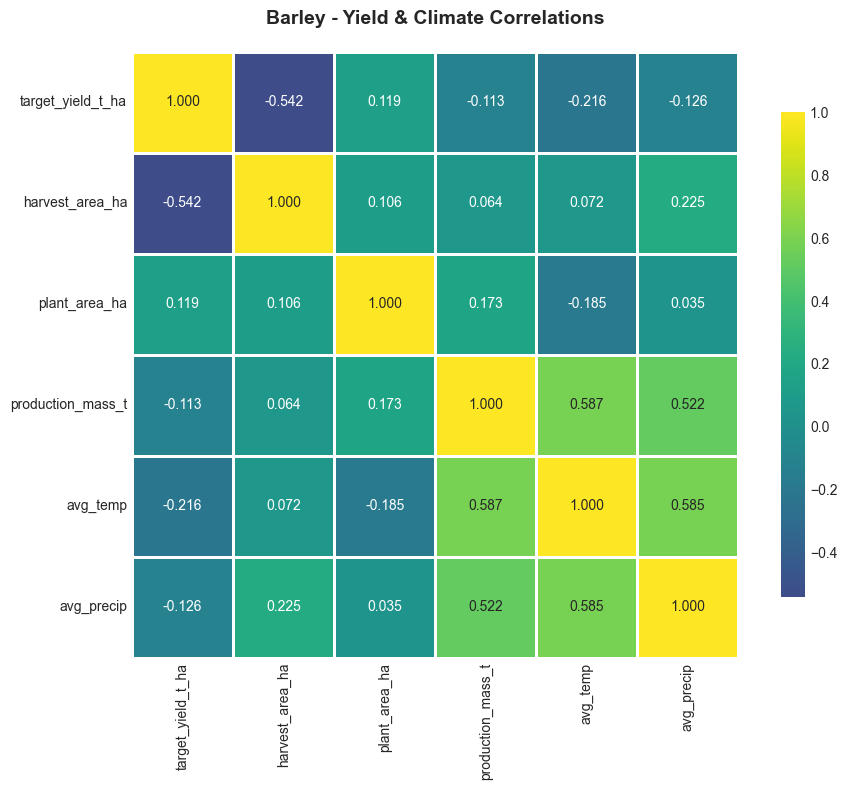

In [16]:
# Yield data correlations (key features)
yield_key_features = ['target_yield_t_ha', 'harvest_area_ha', 'plant_area_ha', 'production_mass_t']

# Add average temperature and precipitation
temp_cols = [f't2m_mean_{i}' for i in range(1, 13)]
precip_cols = [f'precip_mm_{i}' for i in range(1, 13)]

yield_analysis = yield_data[crop][yield_key_features].copy()
yield_analysis['avg_temp'] = yield_data[crop][temp_cols].mean(axis=1)
yield_analysis['avg_precip'] = yield_data[crop][precip_cols].mean(axis=1)

# Correlation matrix
corr_yield = yield_analysis.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_yield, annot=True, fmt='.3f', cmap='viridis', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title(f'{crop.title()} - Yield & Climate Correlations', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot matrix for key relationships
from pandas.plotting import scatter_matrix

features_for_scatter = ['target_yield_t_ha', 'harvest_area_ha', 'avg_temp', 'avg_precip']

fig = plt.figure(figsize=(12, 12))
scatter_matrix(yield_analysis[features_for_scatter], alpha=0.6, figsize=(12, 12), 
               diagonal='kde', hist_kwds={'bins': 20, 'edgecolor': 'black'})
plt.suptitle(f'{crop.title()} - Pairwise Relationships', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 7. Outlier Detection

In [17]:
def detect_outliers_iqr(data, column):
    """
    Detect outliers using IQR method
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Check for outliers in price data
crop = 'barley'

print("="*80)
print(f"OUTLIER DETECTION - {crop.upper()} PRICE DATA")
print("="*80)

price_outlier_features = ['price_nominal', 'usdtry', 'volume']

for feature in price_outlier_features:
    outliers, lower, upper = detect_outliers_iqr(price_data[crop], feature)
    print(f"\n{feature}:")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(price_data[crop])*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  Range: [{outliers[feature].min():.2f}, {outliers[feature].max():.2f}]")

OUTLIER DETECTION - BARLEY PRICE DATA

price_nominal:
  Bounds: [0.79, 2.08]
  Outliers: 0 (0.0%)

usdtry:
  Bounds: [-13.54, 60.25]
  Outliers: 0 (0.0%)

volume:
  Bounds: [632450.63, 6018143.37]
  Outliers: 3 (4.0%)
  Range: [6546214.95, 10384443.71]


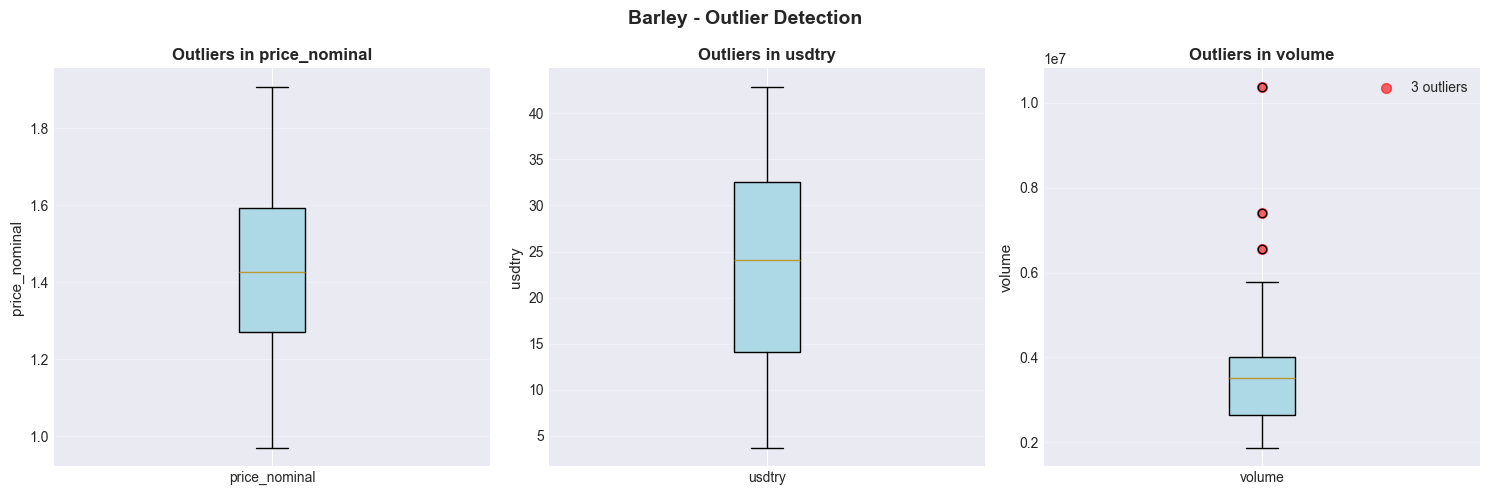

In [18]:
# Visualize outliers with box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, feature in enumerate(price_outlier_features):
    ax = axes[idx]
    
    # Box plot
    bp = ax.boxplot([price_data[crop][feature].dropna()], 
                     labels=[feature], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    
    # Detect outliers
    outliers, lower, upper = detect_outliers_iqr(price_data[crop], feature)
    
    # Plot outliers in red
    if len(outliers) > 0:
        ax.scatter([1] * len(outliers), outliers[feature], 
                   color='red', s=50, alpha=0.6, label=f'{len(outliers)} outliers')
    
    ax.set_ylabel(feature, fontsize=11)
    ax.set_title(f'Outliers in {feature}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    if len(outliers) > 0:
        ax.legend()

plt.suptitle(f'{crop.title()} - Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
# Check for outliers in yield data
print("\n" + "="*80)
print(f"OUTLIER DETECTION - {crop.upper()} YIELD DATA")
print("="*80)

yield_outlier_features = ['target_yield_t_ha', 'harvest_area_ha', 'production_mass_t']

for feature in yield_outlier_features:
    outliers, lower, upper = detect_outliers_iqr(yield_data[crop], feature)
    print(f"\n{feature}:")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(yield_data[crop])*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  Years: {outliers['year'].tolist()}")


OUTLIER DETECTION - BARLEY YIELD DATA

target_yield_t_ha:
  Bounds: [1.90, 4.21]
  Outliers: 0 (0.0%)

harvest_area_ha:
  Bounds: [169589.51, 392915.09]
  Outliers: 0 (0.0%)

production_mass_t:
  Bounds: [429553.92, 1421319.09]
  Outliers: 0 (0.0%)


---
## 8. Seasonal Patterns

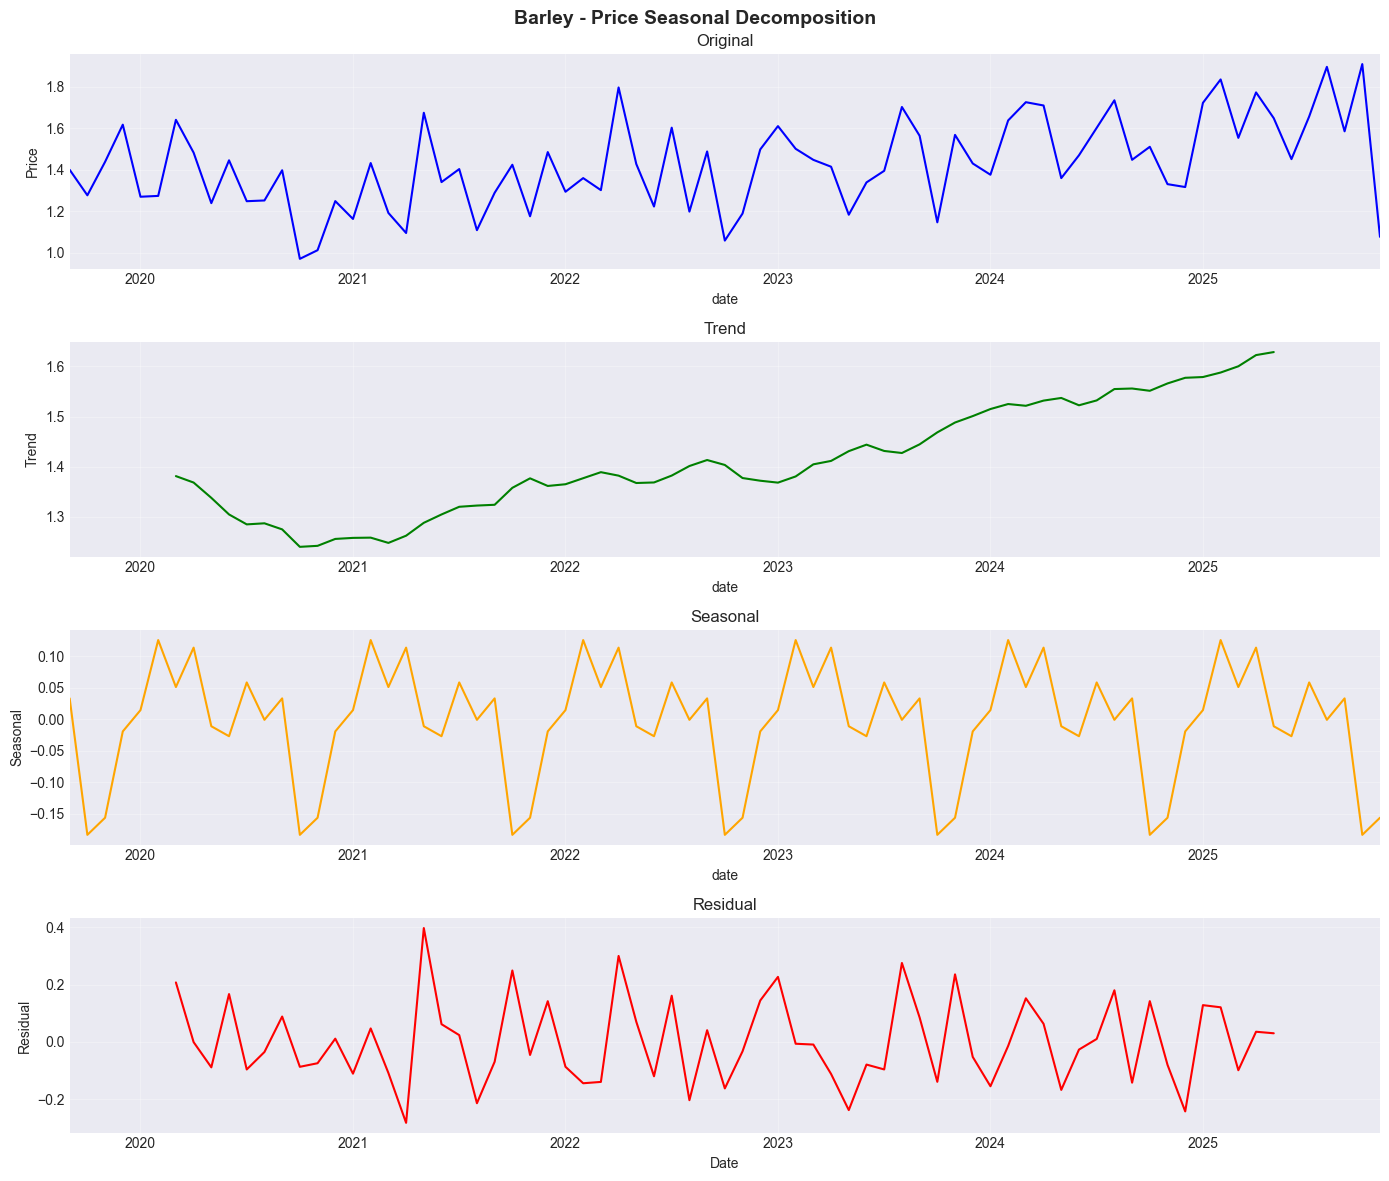

In [20]:
# Seasonal decomposition of price data
from statsmodels.tsa.seasonal import seasonal_decompose

crop = 'barley'

# Prepare time series
ts_data = price_data[crop].set_index('date')['price_nominal'].dropna()

# Decompose
decomposition = seasonal_decompose(ts_data, model='additive', period=12)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

decomposition.observed.plot(ax=axes[0], title='Original', color='blue')
axes[0].set_ylabel('Price')
axes[0].grid(True, alpha=0.3)

decomposition.trend.plot(ax=axes[1], title='Trend', color='green')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

decomposition.seasonal.plot(ax=axes[2], title='Seasonal', color='orange')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

decomposition.resid.plot(ax=axes[3], title='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.suptitle(f'{crop.title()} - Price Seasonal Decomposition', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

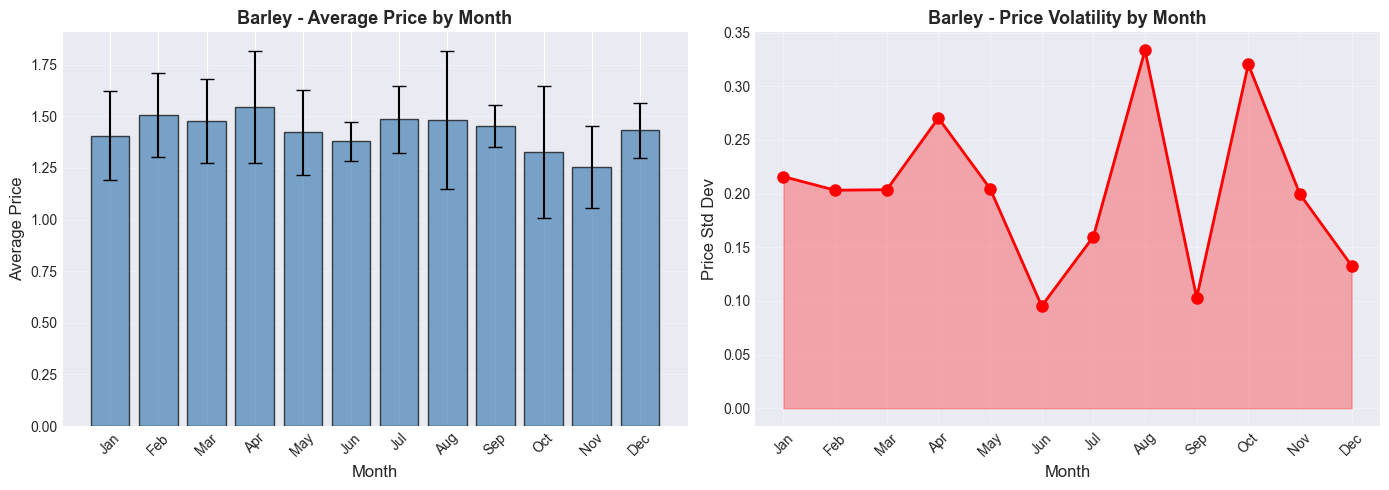


Monthly Price Statistics:
         mean     std  count
month                       
1      1.4054  0.2159      6
2      1.5061  0.2032      6
3      1.4764  0.2036      6
4      1.5447  0.2705      6
5      1.4216  0.2047      6
6      1.3776  0.0953      6
7      1.4841  0.1599      6
8      1.4815  0.3336      6
9      1.4526  0.1032      7
10     1.3276  0.3205      7
11     1.2552  0.1994      7
12     1.4322  0.1329      6


In [22]:
# Monthly price patterns across all years
crop = 'barley'

# Create month column if not exists
price_data[crop]['month_name'] = price_data[crop]['date'].dt.month_name()

# Group by month
monthly_stats = price_data[crop].groupby('month')['price_nominal'].agg(['mean', 'std', 'count'])
monthly_stats = monthly_stats.reindex(range(1, 13))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Average price by month
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[0].bar(months_labels, monthly_stats['mean'], 
            yerr=monthly_stats['std'], capsize=5, alpha=0.7, 
            color='steelblue', edgecolor='black')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Average Price', fontsize=12)
axes[0].set_title(f'{crop.title()} - Average Price by Month', 
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Price volatility by month
axes[1].plot(months_labels, monthly_stats['std'], 'ro-', 
             linewidth=2, markersize=8)
axes[1].fill_between(range(12), monthly_stats['std'], alpha=0.3, color='red')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Price Std Dev', fontsize=12)
axes[1].set_title(f'{crop.title()} - Price Volatility by Month', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nMonthly Price Statistics:")
print(monthly_stats.round(4))

---
## 9. Crop Comparison

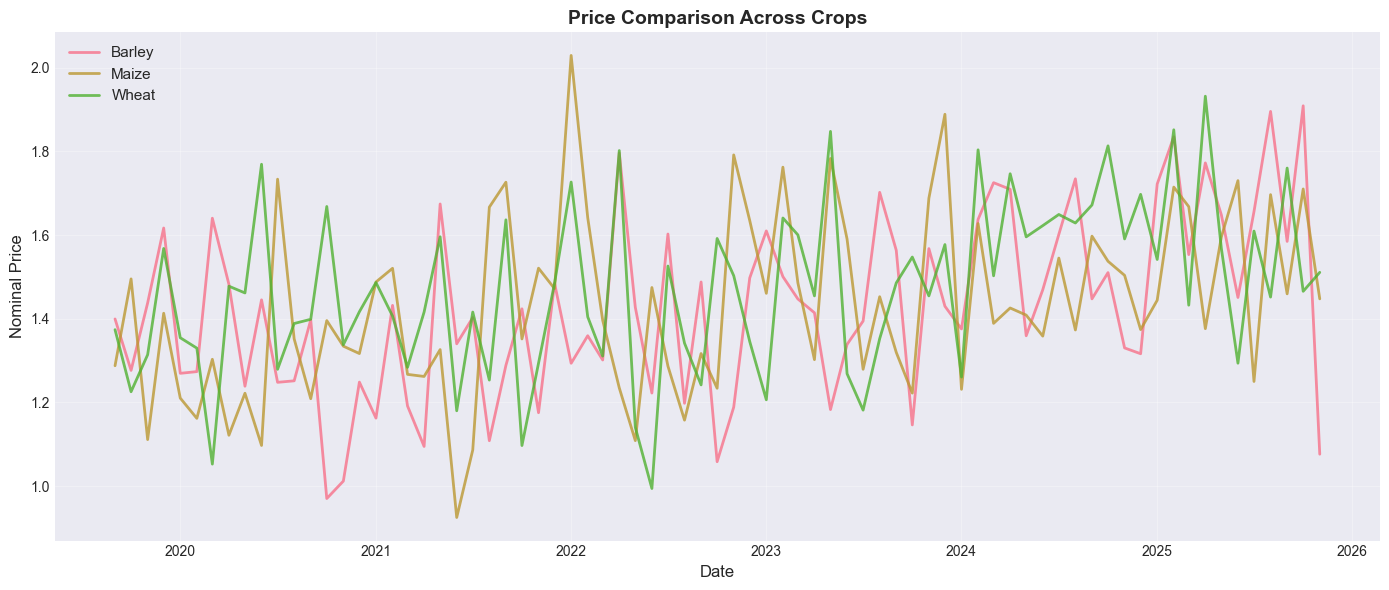

In [21]:
# Compare price trends across crops
fig, ax = plt.subplots(figsize=(14, 6))

for crop in crops:
    ax.plot(price_data[crop]['date'], price_data[crop]['price_nominal'], 
            linewidth=2, label=crop.title(), alpha=0.8)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Nominal Price', fontsize=12)
ax.set_title('Price Comparison Across Crops', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

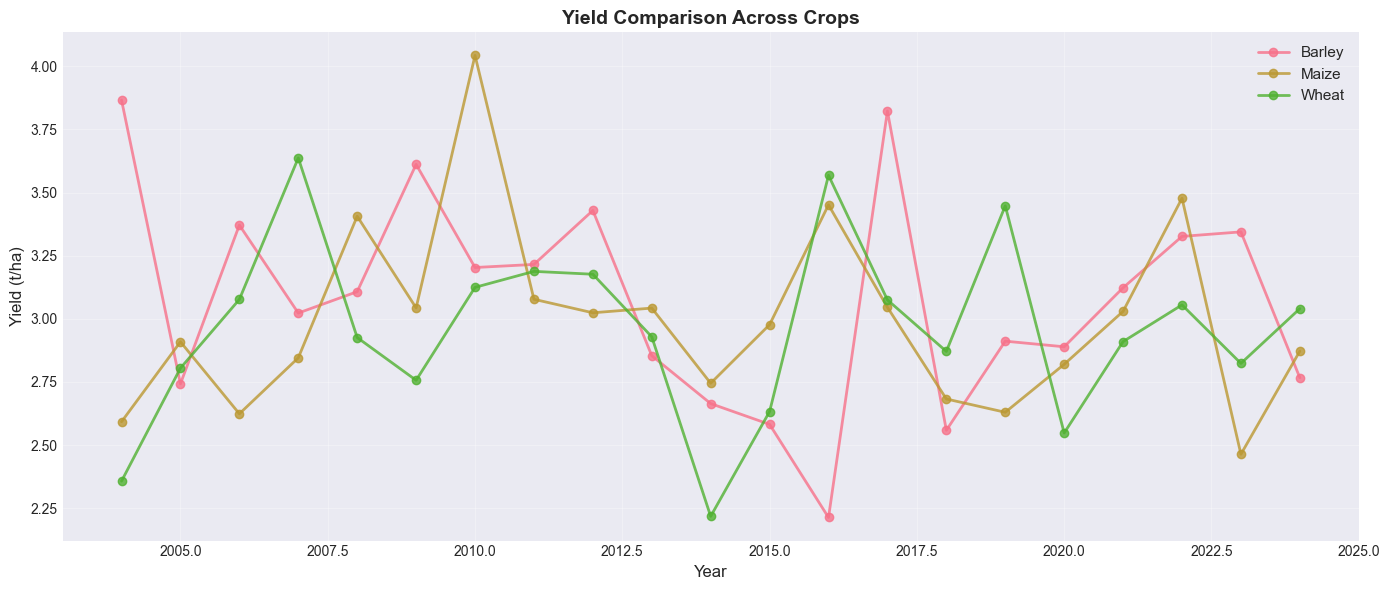

In [23]:
# Compare yield trends across crops
fig, ax = plt.subplots(figsize=(14, 6))

for crop in crops:
    ax.plot(yield_data[crop]['year'], yield_data[crop]['target_yield_t_ha'], 
            'o-', linewidth=2, markersize=6, label=crop.title(), alpha=0.8)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Yield (t/ha)', fontsize=12)
ax.set_title('Yield Comparison Across Crops', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Summary statistics comparison
summary_comparison = pd.DataFrame({
    'Crop': [],
    'Avg Price': [],
    'Price CV': [],
    'Avg Yield': [],
    'Yield CV': [],
    'Avg Harvest Area': []
})

for crop in crops:
    price = price_data[crop]['price_nominal']
    yld = yield_data[crop]['target_yield_t_ha']
    area = yield_data[crop]['harvest_area_ha']
    
    summary_comparison = pd.concat([summary_comparison, pd.DataFrame({
        'Crop': [crop.title()],
        'Avg Price': [price.mean()],
        'Price CV': [price.std() / price.mean()],
        'Avg Yield': [yld.mean()],
        'Yield CV': [yld.std() / yld.mean()],
        'Avg Harvest Area': [area.mean()]
    })], ignore_index=True)

print("="*80)
print("CROP COMPARISON SUMMARY")
print("="*80)
print(summary_comparison.to_string(index=False))

CROP COMPARISON SUMMARY
  Crop  Avg Price  Price CV  Avg Yield  Yield CV  Avg Harvest Area
Barley   1.427010  0.150872   3.077375  0.137843     280947.407436
 Maize   1.431614  0.149483   2.990497  0.122274     304011.506904
 Wheat   1.473356  0.137145   2.960231  0.119928     298946.243771


---
## 10. Summary & Key Insights

In [25]:
print("="*80)
print("KEY FINDINGS - EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n📊 DATA QUALITY:")
print("   ✅ No missing values in any dataset")
print("   ✅ Consistent structure across all crops")
print(f"   ✅ Price data: {len(price_data[crops[0]])} months (2019-2025)")
print(f"   ✅ Yield data: {len(yield_data[crops[0]])} years (2004-2024)")

print("\n⏰ TEMPORAL COVERAGE:")
for crop in crops:
    overlap_years = sorted(set(price_data[crop]['date'].dt.year) & 
                          set(yield_data[crop]['year']))
    overlap_months = len(price_data[crop][price_data[crop]['date'].dt.year.isin(overlap_years)])
    print(f"   • {crop.title()}: {len(overlap_years)} years overlap, {overlap_months} monthly samples")

print("\n📈 PRICE PATTERNS:")
for crop in crops:
    price_mean = price_data[crop]['price_nominal'].mean()
    price_cv = price_data[crop]['price_nominal'].std() / price_mean
    usdtry_range = (price_data[crop]['usdtry'].min(), price_data[crop]['usdtry'].max())
    print(f"   • {crop.title()}:")
    print(f"      - Avg Price: {price_mean:.3f} (CV: {price_cv:.3f})")
    print(f"      - USD/TRY range: {usdtry_range[0]:.2f} - {usdtry_range[1]:.2f}")

print("\n🌾 YIELD PATTERNS:")
for crop in crops:
    yield_mean = yield_data[crop]['target_yield_t_ha'].mean()
    yield_cv = yield_data[crop]['target_yield_t_ha'].std() / yield_mean
    area_mean = yield_data[crop]['harvest_area_ha'].mean()
    print(f"   • {crop.title()}:")
    print(f"      - Avg Yield: {yield_mean:.2f} t/ha (CV: {yield_cv:.3f})")
    print(f"      - Avg Harvest Area: {area_mean:,.0f} ha")

print("\n🌡️ CLIMATE FEATURES:")
crop = 'barley'  # Example
temp_cols = [f't2m_mean_{i}' for i in range(1, 13)]
precip_cols = [f'precip_mm_{i}' for i in range(1, 13)]
avg_temp = yield_data[crop][temp_cols].mean().mean()
avg_precip = yield_data[crop][precip_cols].mean().mean()
print(f"   • Average Temperature: {avg_temp:.1f}°C")
print(f"   • Average Precipitation: {avg_precip:.1f} mm/month")
print(f"   • Total climate features: 72 (extreme weather events)")

print("\n⚠️  POTENTIAL ISSUES:")
print("   • USD/TRY high volatility (5.7 → 42.3, 7.4× increase)")
print("   • Structural breaks likely (COVID-19, geopolitical events)")
print("   • Price data limited to 6 years (2019-2024)")

print("\n✅ RECOMMENDATIONS:")
print("   1. Use real prices (inflation-adjusted) for modeling")
print("   2. Consider structural break detection (2020, 2022)")
print("   3. Apply time-based train/test splits (NOT random)")
print("   4. Feature engineering: seasonal indicators, climate aggregates")
print("   5. Check for non-stationarity in time series")
print("   6. Consider separate models for different time periods")

KEY FINDINGS - EXPLORATORY DATA ANALYSIS

📊 DATA QUALITY:
   ✅ No missing values in any dataset
   ✅ Consistent structure across all crops
   ✅ Price data: 75 months (2019-2025)
   ✅ Yield data: 21 years (2004-2024)

⏰ TEMPORAL COVERAGE:
   • Barley: 6 years overlap, 64 monthly samples
   • Maize: 6 years overlap, 64 monthly samples
   • Wheat: 6 years overlap, 64 monthly samples

📈 PRICE PATTERNS:
   • Barley:
      - Avg Price: 1.427 (CV: 0.151)
      - USD/TRY range: 3.70 - 42.89
   • Maize:
      - Avg Price: 1.432 (CV: 0.149)
      - USD/TRY range: 2.09 - 43.05
   • Wheat:
      - Avg Price: 1.473 (CV: 0.137)
      - USD/TRY range: 1.84 - 45.06

🌾 YIELD PATTERNS:
   • Barley:
      - Avg Yield: 3.08 t/ha (CV: 0.138)
      - Avg Harvest Area: 280,947 ha
   • Maize:
      - Avg Yield: 2.99 t/ha (CV: 0.122)
      - Avg Harvest Area: 304,012 ha
   • Wheat:
      - Avg Yield: 2.96 t/ha (CV: 0.120)
      - Avg Harvest Area: 298,946 ha

🌡️ CLIMATE FEATURES:
   • Average Temperature: 21.5

---
## 📝 Export Summary Statistics

In [26]:
# Create comprehensive summary report
import json

eda_summary = {
    'analysis_date': datetime.now().isoformat(),
    'crops_analyzed': crops,
    'datasets': {},
    'data_quality': {
        'missing_values': 'None',
        'duplicates': 'None detected',
        'outliers': 'Detected and documented'
    }
}

for crop in crops:
    # Calculate overlap
    overlap_years = sorted(set(price_data[crop]['date'].dt.year) & 
                          set(yield_data[crop]['year']))
    overlap_months = len(price_data[crop][price_data[crop]['date'].dt.year.isin(overlap_years)])
    
    eda_summary['datasets'][crop] = {
        'price_data': {
            'n_samples': int(len(price_data[crop])),
            'n_features': int(price_data[crop].shape[1]),
            'period': f"{price_data[crop]['date'].min().strftime('%Y-%m')} to {price_data[crop]['date'].max().strftime('%Y-%m')}",
            'avg_price': float(price_data[crop]['price_nominal'].mean()),
            'price_cv': float(price_data[crop]['price_nominal'].std() / price_data[crop]['price_nominal'].mean())
        },
        'yield_data': {
            'n_samples': int(len(yield_data[crop])),
            'n_features': int(yield_data[crop].shape[1]),
            'period': f"{yield_data[crop]['year'].min()} to {yield_data[crop]['year'].max()}",
            'avg_yield': float(yield_data[crop]['target_yield_t_ha'].mean()),
            'yield_cv': float(yield_data[crop]['target_yield_t_ha'].std() / yield_data[crop]['target_yield_t_ha'].mean())
        },
        'overlap': {
            'years': int(len(overlap_years)),
            'months': int(overlap_months),
            'period': f"{overlap_years[0]} to {overlap_years[-1]}"
        }
    }

# Save to JSON
with open('../results/eda_summary.json', 'w') as f:
    json.dump(eda_summary, f, indent=2)

print("✅ EDA summary exported to: ../results/eda_summary.json")

# Also save comparison table
summary_comparison.to_csv('../results/crop_comparison.csv', index=False)
print("✅ Crop comparison saved to: ../results/crop_comparison.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../results/eda_summary.json'